# The aim of this notebook is to create the K-Nearest Neighbour algorithm using as less libraries as posible

In [40]:
import math
from collections import Counter

 ## Lets create a class that will contain all of the necessary

In [41]:
class KNN:
  # We will use k for the number of neighbours
  def __init__(self,k=3):
      self.k=k
      self.Xtrain=None
      self.Ytrain=None
  #Let´s define a method to introduce the trainning data
  def fit(self,x,y):
    self.Xtrain=x
    self.Ytrain=y
  #Now let´s create a method to predict the class of all the points
  def predict(self,X):
    return [self._predict(x) for x in X]

  #Now the method for each point
  def _predict(self,x):

    # Calculate the distance to every point
    distances = [self._euclidean_distance(x, x_train) for x_train in self.Xtrain]

    # We get the K nearest neighbours
    k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:self.k]

    # Now we take the label of those neighbours
    k_nearest_labels = [self.Ytrain[i] for i in k_indices]

    # We get the most common label
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

  # Auxiliar method to compute the Euclidean distance
  def _euclidean_distance(self, x1, x2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))

With this implementation we will only need to use 2 of the methods fit and predict which makes it pretty easy

## Let´s test the implementation

In [42]:
import random
import matplotlib.pyplot as plt
import pandas as pd

I used a dataset I found online but any will do

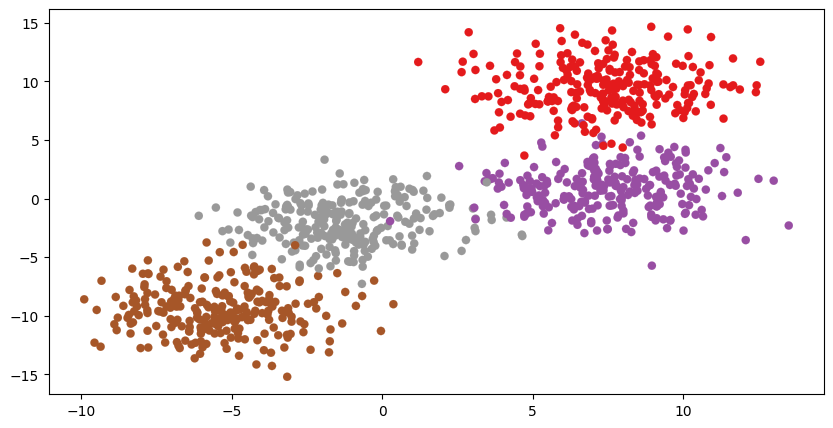

In [43]:
df = pd.read_csv('clust_ex2.csv')
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],c=df['y'],cmap=plt.cm.Set1,linewidths=0.1)
plt.show()

If we didn´t have the class of each point this will be what the data would look like

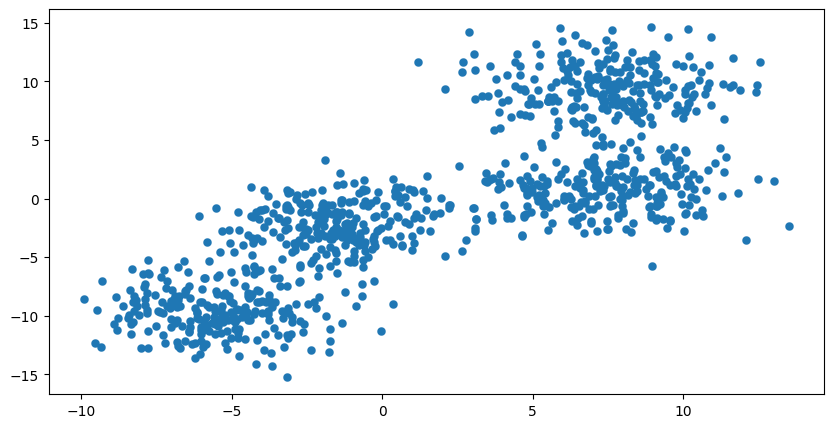

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],linewidths=0.1)
plt.show()

Now let´s see how the algoritm will work on this

In [45]:
#We divide the data into train and test and we get the labels
X_train = df[['x1', 'x2']].values.tolist()
X_test = X_train[:10]
y_train = df['y'].tolist()

# Create and "train" the model
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Hacer predicciones
predictions = knn.predict(X_test)

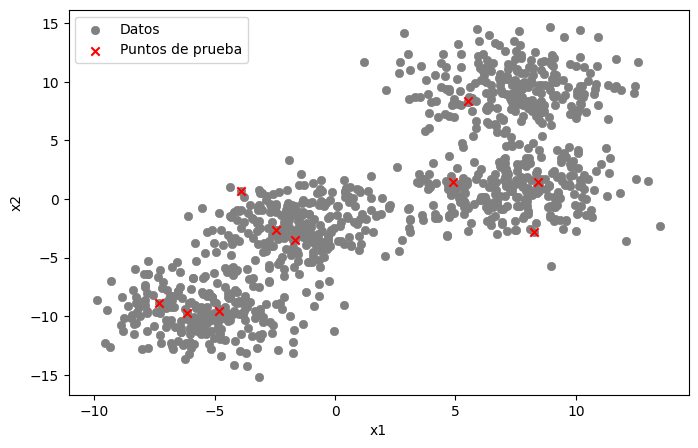

Accuracy: 1.00


In [46]:
# Lets see the data
plt.figure(figsize=(8,5))
plt.scatter(df['x1'], df['x2'], c='gray', linewidths=0.5, label='Datos')
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c='red', marker='x', label='Puntos de prueba')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Let´s calculate the accuracy for the test points
correct = sum(1 for i in range(len(X_test)) if predictions[i] == y_train[i])
accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy:.2f}")




The points taken for test were a bit easy to classify but it´s been proven that the algorithm indeed works how is supposed to.